In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the data
df = pd.read_excel("SP. Dataset - Advanced.xlsx", sheet_name="Dataset", index_col="Date")

# Show the first 5 rows
df.head()

,Open,High,Low,Close,Adj Close,Volume,Price - FTSE 250,Price - FTSE 100,Price - GBP - USD,Price - XLF (financial sector index),Price - EWU,Change % - volatility index,gold price
Date,,,,,,,,,,,,,
2012-12-31,240.245998,243.572501,240.015032,242.463661,176.294033,8.654190e+06,7958.42,5897.81,1.6253,13.31,35.88,-0.2069,1357.398
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,8115.70,6027.37,1.6256,13.69,36.42,NaN,1367.928
2013-01-03,252.449969,256.346271,250.777993,253.690802,184.457215,3.047824e+07,8141.06,6047.34,1.6107,13.68,36.10,-0.0082,1356.426
2013-01-04,254.449875,257.603359,252.924079,255.883361,186.051448,3.391028e+07,8169.14,6089.84,1.6071,13.85,36.36,-0.0501,1335.609
2013-01-07,258.571368,265.438675,254.007233,264.276487,192.154031,6.584778e+07,8186.58,6064.58,1.6114,13.81,36.28,-0.0029,1333.503


In [3]:
# Rename columns
df.rename(columns={'Adj Close':'Adj_Close', 'Price - FTSE 250 ':'FTSE250_Price',
                   'Price - FTSE 100':'FTSE100_Price', 'Price - GBP - USD':'GBP_USD_Price',
                   'Price - XLF (financial sector index) ':'XLF_Price', 'Price - EWU':'EWU_Price', 
                   'Change % - volatility index':'VIX_PC', 'gold price ':'Gold_Price'}, inplace=True)


In [4]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume', 'FTSE250_Price',
       'FTSE100_Price', 'GBP_USD_Price', 'XLF_Price', 'EWU_Price', 'VIX_PC',
       'Gold_Price'],
      dtype='object')

AIM: Predict the missing values in the Close Price History

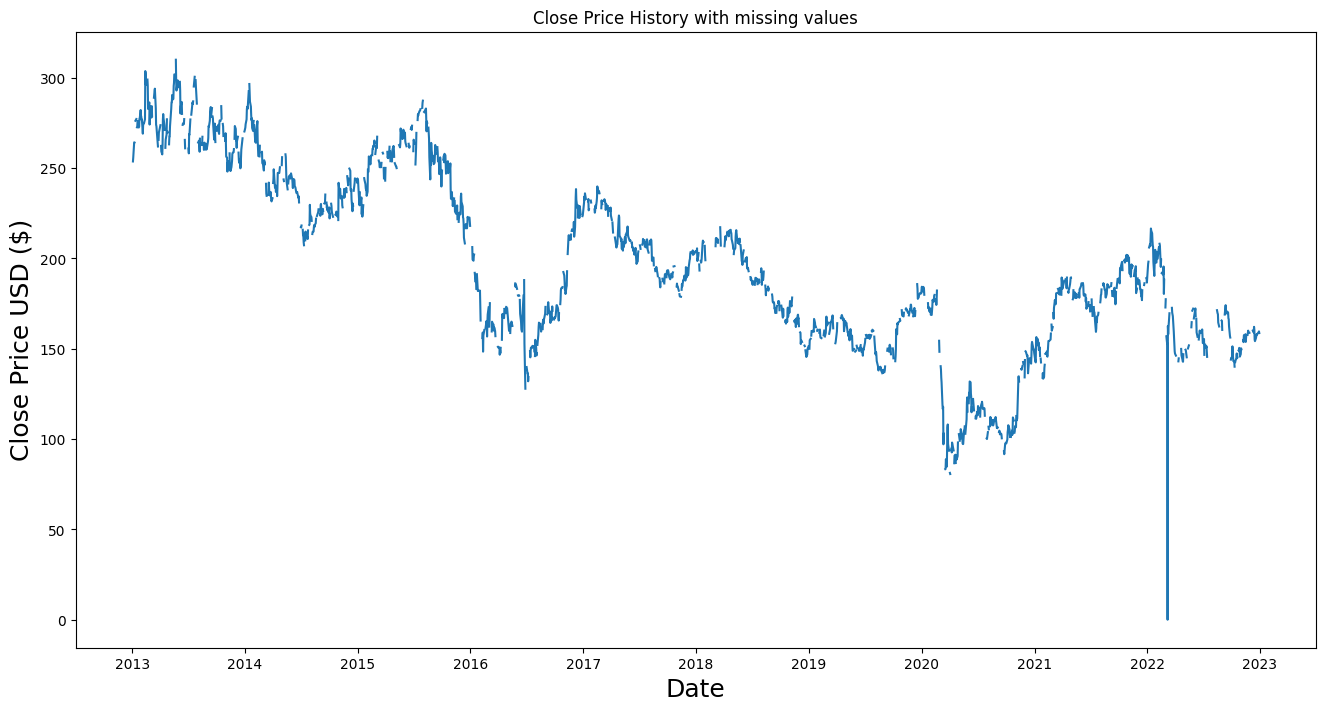

In [5]:
# Visualize Close data
plt.figure(figsize=(16,8))
plt.title('Close Price History with missing values')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
# Find dates where Close is missing
df[df['Close'].isna()]

,Open,High,Low,Close,Adj_Close,Volume,FTSE250_Price,FTSE100_Price,GBP_USD_Price,XLF_Price,EWU_Price,VIX_PC,Gold_Price
Date,,,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,8115.70,6027.37,1.6256,13.69,36.42,NaN,1367.928
2013-01-09,NaN,NaN,NaN,NaN,NaN,NaN,8180.44,6098.65,1.6023,13.75,36.18,NaN,1340.955
2013-01-10,NaN,NaN,NaN,NaN,NaN,NaN,8194.42,6101.51,1.6168,13.93,36.56,NaN,1359.180
2013-01-15,NaN,NaN,NaN,NaN,NaN,NaN,8222.75,6117.31,1.6066,13.91,36.50,NaN,1363.959
2013-01-21,NaN,NaN,NaN,NaN,NaN,NaN,8365.19,6180.98,1.5830,0.00,0.00,NaN,1371.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-29,NaN,NaN,NaN,NaN,NaN,NaN,15940.14,7512.00,1.1953,35.70,30.98,NaN,1428.597
2022-11-30,NaN,NaN,NaN,NaN,NaN,NaN,15921.17,7573.05,1.2056,36.31,31.53,NaN,1425.519
2022-12-02,NaN,NaN,NaN,NaN,NaN,NaN,16101.91,7556.23,1.2287,35.93,31.90,NaN,1465.776


Simplest solution: Linear Interpolation

In [7]:
# Linearly interpolate missing values to new column
df['Close_Interpolated_Linear'] = df['Close'].interpolate(method='linear')

In [8]:
df[df.Close.isna()][['Close', 'Close_Interpolated_Linear']]

,Close,Close_Interpolated_Linear
Date,,
2013-01-02,NaN,248.077232
2013-01-09,NaN,268.201522
2013-01-10,NaN,272.212468
2013-01-15,NaN,274.891572
2013-01-21,NaN,274.326139
...,...,...
2022-11-29,NaN,158.760954
2022-11-30,NaN,158.695713
2022-12-02,NaN,157.338261


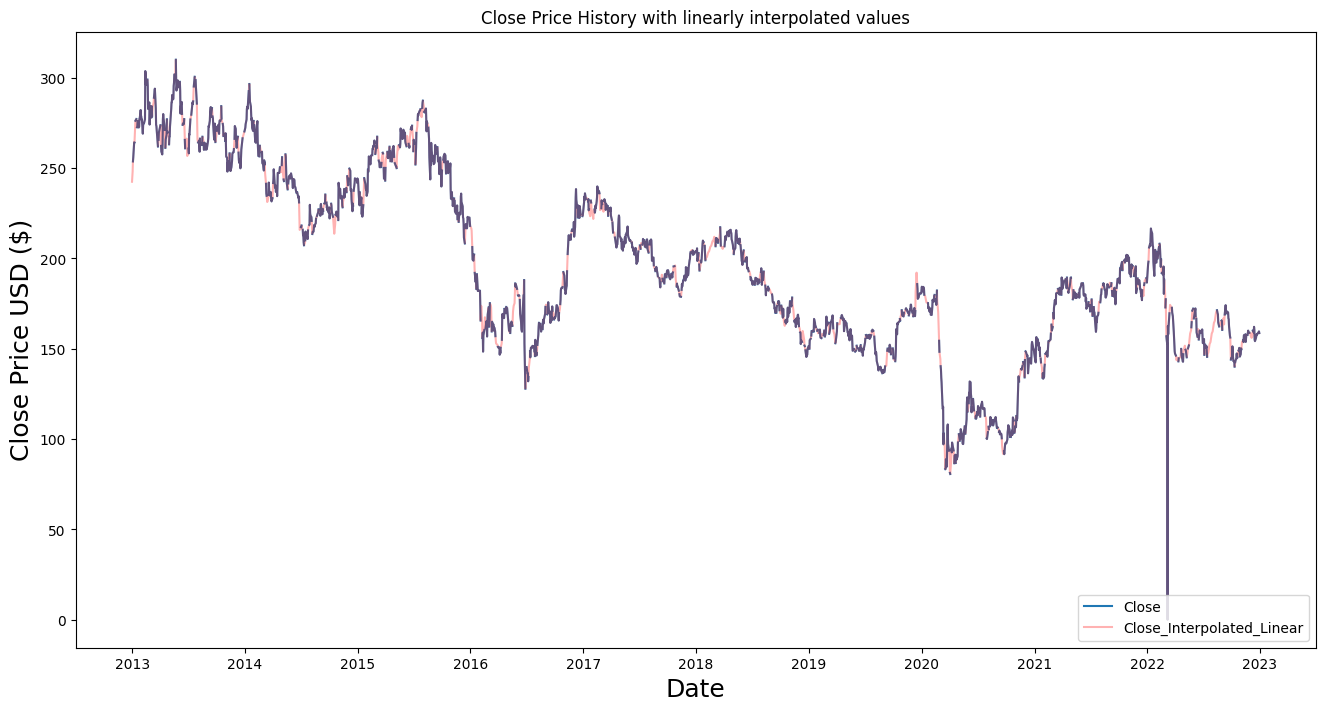

In [9]:
#Plot where Close is missing
plt.figure(figsize=(16,8))
plt.title('Close Price History with linearly interpolated values')
plt.plot(df['Close'])
plt.plot(df['Close_Interpolated_Linear'],c='red',alpha=0.3)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend(['Close', 'Close_Interpolated_Linear'], loc='lower right')
plt.show()


Feature Engineering:\
Potential features to add:\
Lagged Close\
Rolling means\
Interactions between variables

Data Splits:\
 20% is evaluation set\
Take remaining 10% as test data and rest as training.


In [11]:
# Define evaluation data
eval_df = df[df.Close.isna()]

In [53]:
eval_df

,Open,High,Low,Close,Adj_Close,Volume,FTSE250_Price,FTSE100_Price,GBP_USD_Price,XLF_Price,EWU_Price,VIX_PC,Gold_Price,Close_Interpolated_Linear
Date,,,,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,-2.055014,-1.644667,1.623847,-1.617271,0.655118,NaN,0.960098,1.044437
2013-01-09,NaN,NaN,NaN,NaN,NaN,NaN,-2.030797,-1.506505,1.461086,-1.608607,0.597248,NaN,0.831667,1.454952
2013-01-10,NaN,NaN,NaN,NaN,NaN,NaN,-2.025567,-1.500961,1.562375,-1.582617,0.688876,NaN,0.918445,1.536772
2013-01-15,NaN,NaN,NaN,NaN,NaN,NaN,-2.014970,-1.470336,1.491124,-1.585505,0.674409,NaN,0.941200,1.591423
2013-01-21,NaN,NaN,NaN,NaN,NaN,NaN,-1.961687,-1.346924,1.326267,-3.593948,-8.126730,NaN,0.977068,1.579888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-29,NaN,NaN,NaN,NaN,NaN,NaN,0.871900,1.232993,-1.381987,1.560719,-0.656613,NaN,1.248972,-0.777527
2022-11-30,NaN,NaN,NaN,NaN,NaN,NaN,0.864804,1.351326,-1.310037,1.648796,-0.523993,NaN,1.234316,-0.778858
2022-12-02,NaN,NaN,NaN,NaN,NaN,NaN,0.932414,1.318724,-1.148673,1.593928,-0.434776,NaN,1.425998,-0.806549


In [12]:
# Observe how much missing data is in the train and test sets
df[df.Close.notna()].isna().sum()

Open                          0
High                          0
Low                           0
Close                         0
Adj_Close                     0
Volume                        0
FTSE250_Price                 0
FTSE100_Price                 0
GBP_USD_Price                 0
XLF_Price                    37
EWU_Price                    37
VIX_PC                       31
Gold_Price                    0
Close_Interpolated_Linear     0
dtype: int64

In [13]:
#Get dates for missing train and test data
df[df.Close.notna()].isna().index

DatetimeIndex(['2012-12-31', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-11', '2013-01-14', '2013-01-16',
               '2013-01-17', '2013-01-18',
               ...
               '2022-12-15', '2022-12-16', '2022-12-19', '2022-12-20',
               '2022-12-21', '2022-12-22', '2022-12-23', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=2015, freq=None)

We will choose to drop this missing data but can also experiment later on with interpolating this to gain additional ~30 data points.

In [14]:
# Drop missing values in train and test sets
test_and_train_df = df[df.Close.notna()].dropna()

In [15]:
 # Define percentage of data to be used for training
train_percent = 0.9

# Define train and test sets randomly
train_df = test_and_train_df.sample(frac=train_percent,random_state=0)
test_df = test_and_train_df.drop(train_df.index)


Model Selection Ideas:\

Autoregressive Integrated Moving Average (ARIMA):

ARIMA models are a class of statistical models that can capture different aspects of time series data. They are particularly useful for capturing trends and seasonality.
Seasonal Decomposition of Time Series (STL):

STL decomposes time series data into seasonal, trend, and residual components, making it easier to model and predict each component individually.
Prophet:

Prophet is an open-source forecasting tool developed by Facebook that is designed for forecasting time series data that exhibit seasonal patterns and have holiday effects.
Exponential Smoothing Methods (e.g., Holt-Winters):

Exponential smoothing methods like Holt-Winters can be effective for capturing trends and seasonality in time series data.
Long Short-Term Memory (LSTM):

LSTMs are a type of recurrent neural network (RNN) that are well-suited for processing sequences of data. They can capture complex relationships in time series data.
Gated Recurrent Unit (GRU):

GRUs are another type of recurrent neural network similar to LSTMs. They can also be effective for time series forecasting tasks.
XGBoost, Random Forest, and Gradient Boosting Models:

Ensemble learning models like XGBoost, Random Forest, and Gradient Boosting can be adapted for time series forecasting by incorporating lagged values as features.
Support Vector Machines (SVM):

SVMs can be used for time series regression by transforming the time series data into a feature space and applying the SVM algorithm.
Neural Prophet:

Neural Prophet is an extension of the Prophet model that leverages neural networks for improved forecasting capabilities.
Convolutional Neural Networks (CNNs):

CNNs, primarily designed for image recognition, can also be adapted for time series forecasting by treating the time series as an image with one dimension.
Gaussian Process Regression (GPR):

GPR is a probabilistic model that can be used for time series forecasting. It provides uncertainty estimates along with predictions.
VAR (Vector Autoregressive) Models:

VAR models can be useful when you have multiple time series variables, and you want to model the relationships between them.
Facebook's NeuralProphet:

NeuralProphet is an extension of Prophet that leverages neural networks for improved performance.

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

In [22]:
# Normalize
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
eval_df = (eval_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [23]:
# Define x and y train and test sets
x_train = train_df.drop('Close', axis=1).to_numpy()
y_train = train_df['Close'].to_numpy()
x_test = test_df.drop('Close', axis=1).to_numpy()
y_test = test_df['Close'].to_numpy()

In [221]:
# Define RMSE as loss function
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(x_train.shape[1], 1)),  # LSTM layer with 50 units
    Dense(1)  # Output layer with 1 neuron for predicting 'Close'
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(), loss = rmse, metrics=['accuracy'])

# Reshape x_train and x_test to fit the LSTM input shape
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/10


2023-10-31 14:35:10.466274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


56/56 [==============================] - ETA: 0s - loss: 0.9751 - accuracy: 0.0000e+00

2023-10-31 14:35:13.609566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


56/56 [==============================] - 4s 54ms/step - loss: 0.9751 - accuracy: 0.0000e+00 - val_loss: 0.8546 - val_accuracy: 0.0000e+00
Epoch 2/10
56/56 [==============================] - 2s 44ms/step - loss: 0.7420 - accuracy: 0.0000e+00 - val_loss: 0.5738 - val_accuracy: 0.0000e+00
Epoch 3/10
56/56 [==============================] - 2s 42ms/step - loss: 0.5063 - accuracy: 0.0000e+00 - val_loss: 0.5559 - val_accuracy: 0.0000e+00
Epoch 4/10
56/56 [==============================] - 2s 42ms/step - loss: 0.4725 - accuracy: 0.0000e+00 - val_loss: 0.5196 - val_accuracy: 0.0000e+00
Epoch 5/10
56/56 [==============================] - 2s 41ms/step - loss: 0.4440 - accuracy: 0.0000e+00 - val_loss: 0.5076 - val_accuracy: 0.0000e+00
Epoch 6/10
56/56 [==============================] - 3s 46ms/step - loss: 0.4284 - accuracy: 0.0000e+00 - val_loss: 0.4886 - val_accuracy: 0.0000e+00
Epoch 7/10
56/56 [==============================] - 3s 46ms/step - loss: 0.4119 - accuracy: 0.0000e+00 - val_loss: 0.

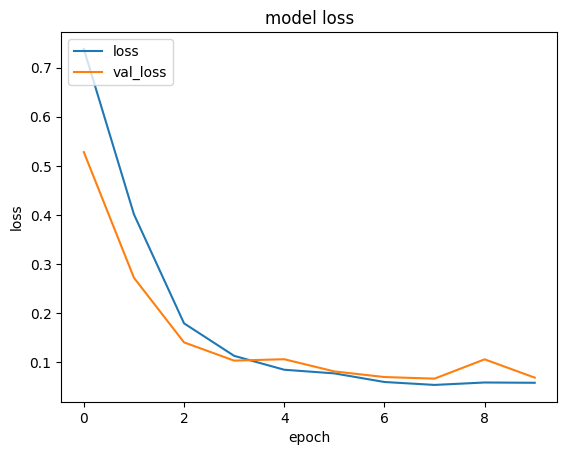

In [66]:
# Plot model performance
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend( loc='upper left')
plt.show()

ISSUE:

In [96]:
# Predict eval_df
x_eval = eval_df.drop('Close', axis=1).to_numpy()
x_eval = x_eval.reshape((x_eval.shape[0], x_eval.shape[1], 1))
y_eval = model.predict(x_eval)
print(y_eval)


17/17 [==============================] - 0s 18ms/step
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 

DUE TO NAN IN X_EVAL

In [92]:
eval_df.isna().sum()

Open                         513
High                         513
Low                          513
Close                        513
Adj_Close                    513
Volume                       513
FTSE250_Price                  1
FTSE100_Price                  0
GBP_USD_Price                  0
XLF_Price                     12
EWU_Price                     12
VIX_PC                       513
Gold_Price                     0
Close_Interpolated_Linear      0
dtype: int64

In [93]:
test_df.isna().sum()

Open                         0
High                         0
Low                          0
Close                        0
Adj_Close                    0
Volume                       0
FTSE250_Price                0
FTSE100_Price                0
GBP_USD_Price                0
XLF_Price                    0
EWU_Price                    0
VIX_PC                       0
Gold_Price                   0
Close_Interpolated_Linear    0
dtype: int64

In [94]:
train_df.isna().sum()

Open                         0
High                         0
Low                          0
Close                        0
Adj_Close                    0
Volume                       0
FTSE250_Price                0
FTSE100_Price                0
GBP_USD_Price                0
XLF_Price                    0
EWU_Price                    0
VIX_PC                       0
Gold_Price                   0
Close_Interpolated_Linear    0
dtype: int64

HAVE TO SELECT CORRECT FEATURES FOR X_TRAIN AND X_TEST

In [107]:
# Define x train and test sets to mitigate nan values in x_eval
features = ["FTSE250_Price","FTSE100_Price","GBP_USD_Price","XLF_Price","EWU_Price","Gold_Price"]
x_train = train_df[features].to_numpy()
x_test = test_df[features].to_numpy()

RERUN MODEL TRAINING

In [224]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model
model = Sequential([
    LSTM(25, activation='tanh', input_shape=(x_train.shape[1], 1)),  # LSTM layer with 50 units
    Dense(1)  # Output layer with 1 neuron for predicting 'Close'
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.RMSprop(), loss = rmse)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)  # Stop if val_loss doesn't improve for 10 epochs

# Reshape x_train and x_test to fit the LSTM input shape
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=200, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")


Epoch 1/200


2023-10-31 16:13:29.776599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-31 16:13:30.044393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-31 16:13:30.432176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - 3s 43ms/step - loss: 0.9819 - val_loss: 0.8939
Epoch 2/200


2023-10-31 16:13:31.649322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-31 16:13:31.703720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - 0s 11ms/step - loss: 0.9443 - val_loss: 0.8428
Epoch 3/200
28/28 [==============================] - 0s 10ms/step - loss: 0.8554 - val_loss: 0.7340
Epoch 4/200
28/28 [==============================] - 0s 10ms/step - loss: 0.6828 - val_loss: 0.5690
Epoch 5/200
28/28 [==============================] - 0s 10ms/step - loss: 0.5240 - val_loss: 0.5159
Epoch 6/200
28/28 [==============================] - 0s 10ms/step - loss: 0.4822 - val_loss: 0.4934
Epoch 7/200
28/28 [==============================] - 0s 10ms/step - loss: 0.4630 - val_loss: 0.4758
Epoch 8/200
28/28 [==============================] - 0s 9ms/step - loss: 0.4490 - val_loss: 0.4647
Epoch 9/200
28/28 [==============================] - 0s 9ms/step - loss: 0.4343 - val_loss: 0.4565
Epoch 10/200
28/28 [==============================] - 0s 10ms/step - loss: 0.4270 - val_loss: 0.4464
Epoch 11/200
28/28 [==============================] - 0s 10ms/step - loss: 0.4175 - val_loss: 0.4416
Epoch 12/200

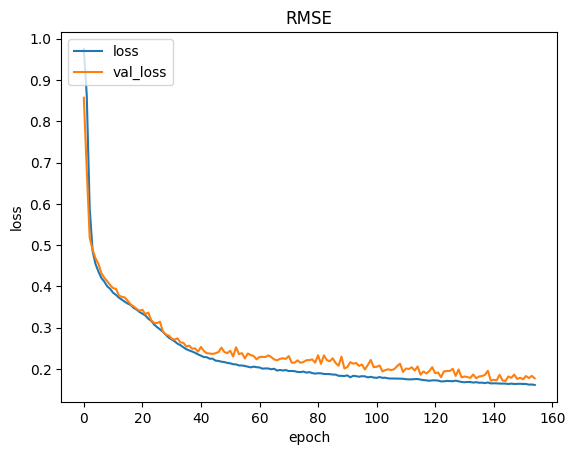

In [206]:
# Plot model performance
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('RMSE')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend( loc='upper left')
plt.show()

Have to populate a few missing values in x_eval

In [207]:
eval_df[features].isna().sum()

FTSE250_Price     1
FTSE100_Price     0
GBP_USD_Price     0
XLF_Price        12
EWU_Price        12
Gold_Price        0
dtype: int64

In [208]:
# Linear interpolate missing values in x_eval
x_eval = eval_df[features].interpolate().to_numpy()

In [209]:
# Predict y_eval
y_eval = model.predict(x_eval)

 1/17 [>.............................] - ETA: 5s

2023-10-31 14:21:53.671171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-31 14:21:53.717690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 0s 8ms/step


In [210]:
#Reverse normalisation
pred = y_eval * train_std["Close"] + train_mean["Close"]

In [211]:
#Create new df for Close of original with NAN data as the predicted values
pred_df = df["Close"] * 1.0
pred_df[pred_df.isna()] = pred.flatten()

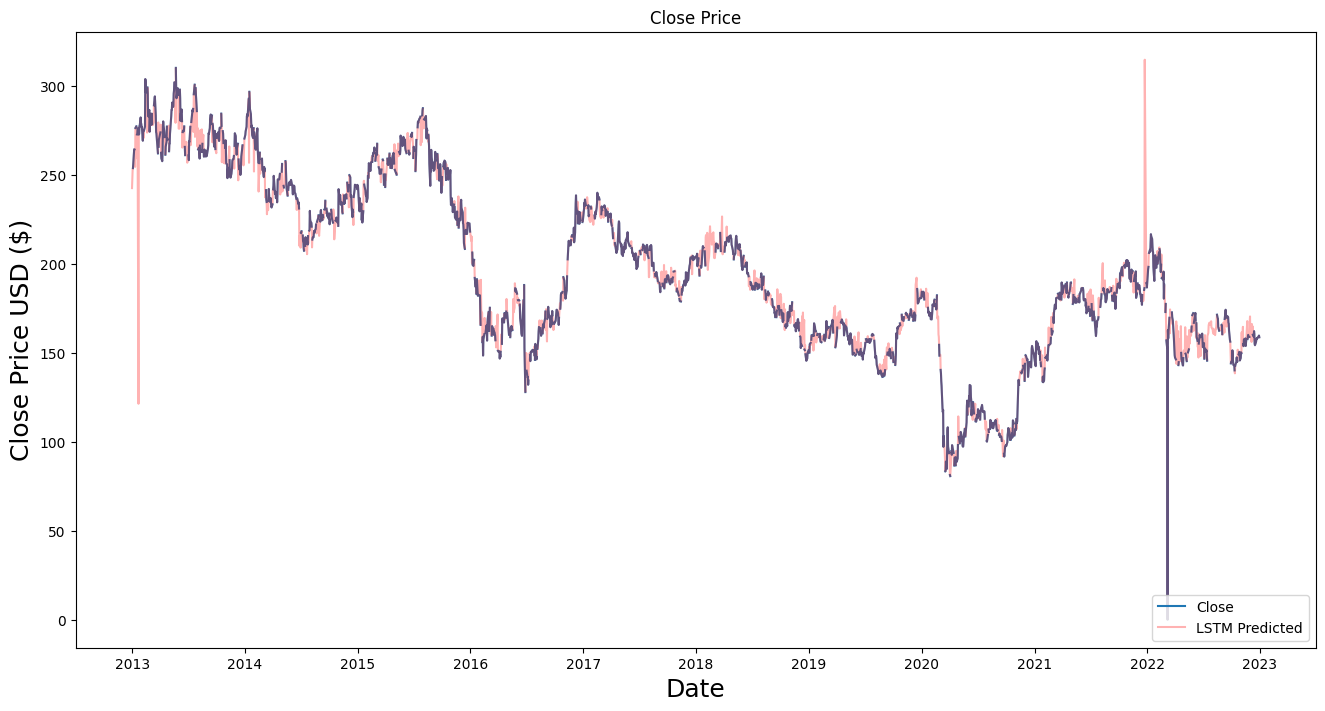

In [216]:
#Plot original Close and predicted Close
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(df['Close'])
plt.plot(pred_df,c='red',alpha=0.3)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend(['Close', 'LSTM Predicted'], loc='lower right')
plt.show()

Do not think these spikes are realistic - probably caused by the big spike in the train data

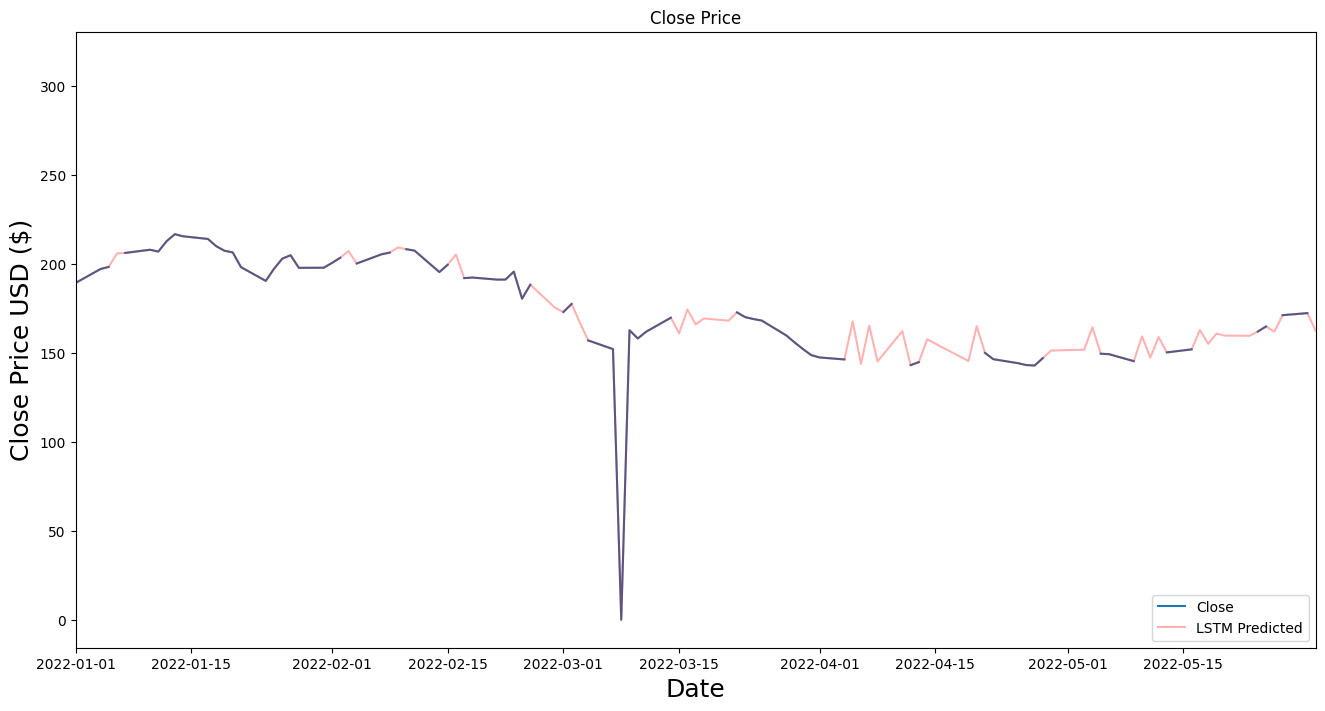

In [231]:
#Plot original Close and predicted Close
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(df['Close'])
plt.plot(pred_df,c='red',alpha=0.3)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend(['Close', 'LSTM Predicted'], loc='lower right')
#change to show only specific year
plt.xlim(pd.Timestamp('2022-01-01'), pd.Timestamp('2022-05-31'))
plt.show()

In [236]:
#select dates around 2022-03-08
df.Close['2022-03-01':'2022-03-15']

Date
2022-03-01    172.854129
2022-03-02    177.430664
2022-03-03           NaN
2022-03-04    156.910894
2022-03-07    152.027164
2022-03-08      0.000000
2022-03-09    162.633167
2022-03-10    157.994968
2022-03-11    161.758423
2022-03-14    169.658740
2022-03-15           NaN
Name: Close, dtype: float64

This looks like an anomaly - let's replace it with an interpolated value an rerun

In [ ]:
#change the 0 value to interpolated value
df.Close['2022-03-08'] = 

In [ ]:
# Lets create some features


In [225]:
test_df.corr()

,Open,High,Low,Close,Adj_Close,Volume,FTSE250_Price,FTSE100_Price,GBP_USD_Price,XLF_Price,EWU_Price,VIX_PC,Gold_Price,Close_Interpolated_Linear
Open,1.000000,0.997768,0.998675,0.997106,0.967004,-0.068361,-0.592297,-0.078292,0.738017,-0.479327,0.715399,-0.170962,-0.479033,0.997106
High,0.997768,1.000000,0.997437,0.998595,0.966587,-0.028527,-0.602383,-0.091647,0.739351,-0.488636,0.710194,-0.159494,-0.477856,0.998595
Low,0.998675,0.997437,1.000000,0.998672,0.969930,-0.080006,-0.587104,-0.065248,0.735966,-0.475154,0.718413,-0.185992,-0.478110,0.998672
Close,0.997106,0.998595,0.998672,1.000000,0.969723,-0.054943,-0.595160,-0.075475,0.738293,-0.481846,0.716071,-0.180304,-0.479666,1.000000
Adj_Close,0.967004,0.966587,0.969930,0.969723,1.000000,-0.082616,-0.400015,0.052366,0.650765,-0.288924,0.661982,-0.190234,-0.361526,0.969723
Volume,-0.068361,-0.028527,-0.080006,-0.054943,-0.082616,1.000000,-0.100815,-0.194708,0.005441,-0.061654,-0.043046,0.376329,0.024210,-0.054943
FTSE250_Price,-0.592297,-0.602383,-0.587104,-0.595160,-0.400015,-0.100815,1.000000,0.591546,-0.639731,0.896696,-0.422918,0.039895,0.541499,-0.595160
FTSE100_Price,-0.078292,-0.091647,-0.065248,-0.075475,0.052366,-0.194708,0.591546,1.000000,-0.397866,0.535201,0.091940,-0.155120,0.043258,-0.075475
GBP_USD_Price,0.738017,0.739351,0.735966,0.738293,0.650765,0.005441,-0.639731,-0.397866,1.000000,-0.518856,0.759679,-0.112095,-0.335586,0.738293
XLF_Price,-0.479327,-0.488636,-0.475154,-0.481846,-0.288924,-0.061654,0.896696,0.535201,-0.518856,1.000000,-0.176877,0.012288,0.559075,-0.481846
